In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

dataset = read_csv('/content/drive/MyDrive/Analysis/lab1/Student.csv', sep=',',quotechar='"')
print(dataset.head(0))

Empty DataFrame
Columns: [Gender, Age, Academic Pressure, Study Satisfaction, Sleep Duration, Dietary Habits, Have you ever had suicidal thoughts ?, Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


Этот набор данных исследует связь между психическим здоровьем и различными демографическими, академическими факторами и факторами образа жизни. Он включает в себя такие атрибуты, как

1.   Gender(пол): мужчины (male), женщины (female),
2.   Age(возраст): определение возраста студента,
2.   Academic Pressure(академическое давление): измеряет по 5-ти бальной шкале от 1 до 5,
2.   Study Satisfaction(удовлетворенность учебой): тоже измеряется по 5-ти бальной шкале от 1 до 5,
1.   Sleep Duration(продолжительность сна): пишется промежутками по типу более 8 часов или 5-6 часов,
2.   Dietary Habits(пищевые привычки): в данном поле пишется - питается ли человек здоровой пищей(Healthy) или вредной(Unhealthy) или что-то среднее(Moderate),
2.   Have you ever had suicidal thoughts ?(были ли депрессия и мысли о самоубийстве): да/нет,
2.   Study Hours(часы учебы): среднее время обучения в часа,
2.   Financial Stress(финансовый стресс): измеряет по 5-ти бальной шкале от 1 до 5,
2.   Family History of Mental Illness(семейный анамнез психических заболеваний): есть ли анамнез - да или нет,

Набор данных позволяет изучить, как такие факторы, как качество сна, диета и учебная нагрузка, влияют на психическое благополучие, предлагая потенциальные приложения для выявления закономерностей рисков для психического здоровья и продвижения профилактических стратегий для улучшения результатов психического здоровья среди различных демографических групп.

In [ ]:
dataset.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [ ]:
dataset.describe(include=['O'])

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,502,502,502,502,502,502
unique,2,4,3,2,2,2
top,Male,7-8 hours,Moderate,Yes,No,Yes
freq,267,128,172,260,265,252


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [ ]:
dataset.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


<Axes: xlabel='Gender', ylabel='count'>

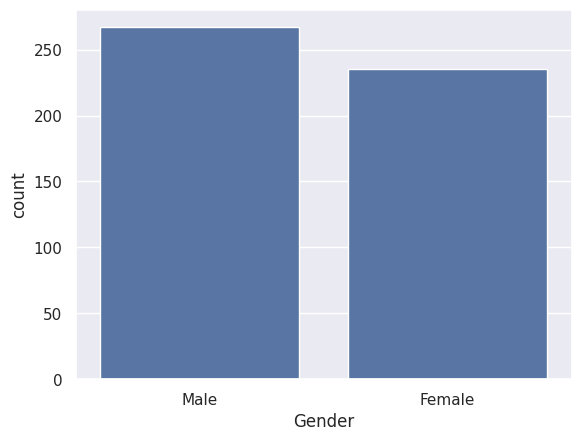

In [ ]:
sns.countplot(x=dataset["Gender"])

<Axes: xlabel='Dietary Habits', ylabel='count'>

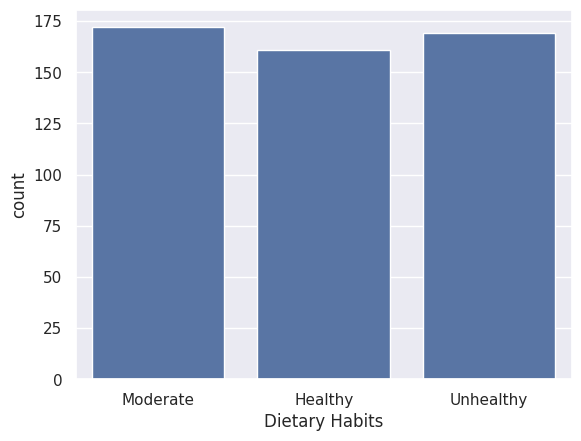

In [ ]:
sns.countplot(x=dataset["Dietary Habits"])

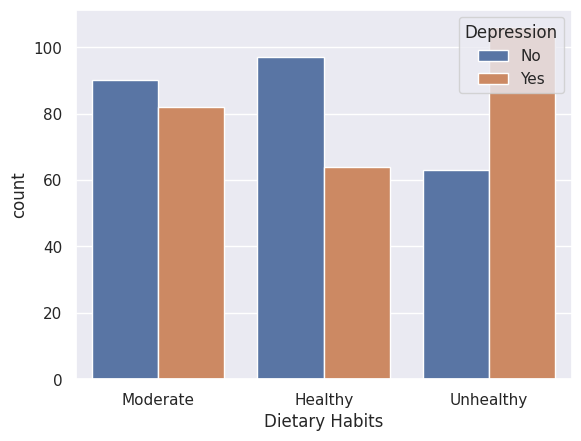

In [ ]:
sns.countplot(data=dataset, x="Dietary Habits", hue='Depression');

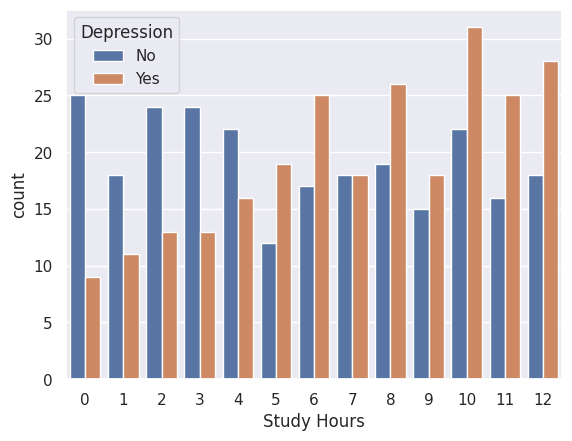

In [ ]:
sns.countplot(data=dataset, x="Study Hours", hue='Depression');


- **Нормализация**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

dataset[['mmAge', 'mmStudyH']] = scaler_mm.fit_transform(dataset[['Age', 'Study Hours']])
dataset.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,mmAge,mmStudyH
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No,0.6250,0.750000
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No,0.6250,0.583333
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes,0.4375,0.833333
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No,0.3125,0.583333
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No,0.8125,0.333333


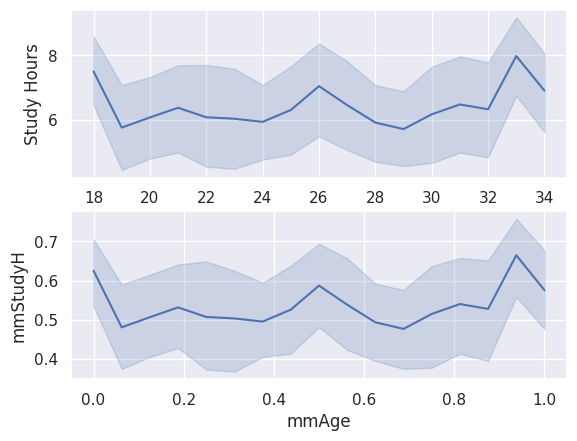

In [ ]:
_, axs = plt.subplots(nrows=2)
sns.lineplot(data=dataset, x='Age', y='Study Hours', ax=axs[0])
sns.lineplot(data=dataset, x='mmAge', y='mmStudyH', ax=axs[1]);

- **Кодирование категориальных признаков**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

dataset[['Gender', 'Sleep Duration', 'Dietary Habits','Have you ever had suicidal thoughts ?','Family History of Mental Illness','Depression']] = enc_.fit_transform(dataset[['Gender', 'Sleep Duration', 'Dietary Habits','Have you ever had suicidal thoughts ?','Family History of Mental Illness','Depression']])

In [ ]:
dataset.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,mmAge,mmStudyH
0,1.0,28,2.0,4.0,1.0,1.0,1.0,9,2,1.0,0.0,0.6250,0.750000
1,1.0,28,4.0,5.0,0.0,0.0,1.0,7,1,1.0,0.0,0.6250,0.583333
2,1.0,25,1.0,3.0,0.0,2.0,1.0,10,4,0.0,1.0,0.4375,0.833333
3,1.0,23,1.0,4.0,3.0,2.0,1.0,7,2,1.0,0.0,0.3125,0.583333
4,0.0,31,1.0,5.0,3.0,0.0,1.0,4,2,1.0,0.0,0.8125,0.333333


In [ ]:
enc_.categories_

[array(['Female', 'Male'], dtype=object),
 array(['5-6 hours', '7-8 hours', 'Less than 5 hours', 'More than 8 hours'],
       dtype=object),
 array(['Healthy', 'Moderate', 'Unhealthy'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

- **Тепловая карта**

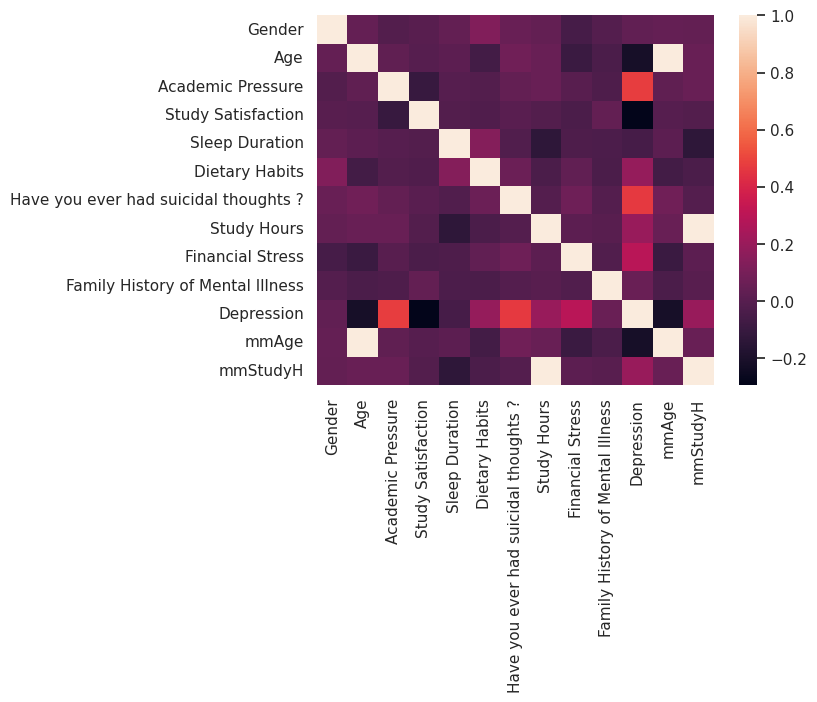

In [ ]:
sns.heatmap(dataset.corr(numeric_only = True));

In [ ]:
dataset.to_csv('/content/drive/MyDrive/Analysis/lab2/Student.csv', sep=',', quotechar='"', index=False)